In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume,194_ma,196_ma,Strategy,Asset_Returns,Strategy_Returns
Date,,,,,,,,,,
1993-02-01,24.553844,24.553844,24.397782,24.397782,480500,24.467592,24.467587,-1.0,0.007112,-0.007112
1993-02-02,24.605862,24.623202,24.484480,24.536501,201300,24.514158,24.514150,1.0,0.009246,-0.005009
1993-02-03,24.865971,24.883311,24.623207,24.640547,529400,24.603476,24.603456,1.0,0.019915,0.005509
1993-02-04,24.970016,25.022037,24.675232,24.952676,531500,24.678303,24.678272,1.0,0.024182,0.009717
1993-02-05,24.952675,25.004696,24.813953,24.952675,492100,24.725218,24.725180,1.0,0.023471,0.009015
...,...,...,...,...,...,...,...,...,...,...
2025-08-18,643.299988,644.000000,642.179993,642.859985,43804900,587.909868,587.573724,1.0,25.385900,21.657406
2025-08-19,639.809998,644.109985,638.479980,643.119995,69750700,588.442177,588.104041,1.0,25.242753,21.534487
2025-08-20,638.109985,639.659973,632.950012,639.400024,88890300,588.951590,588.611716,1.0,25.173024,21.474611


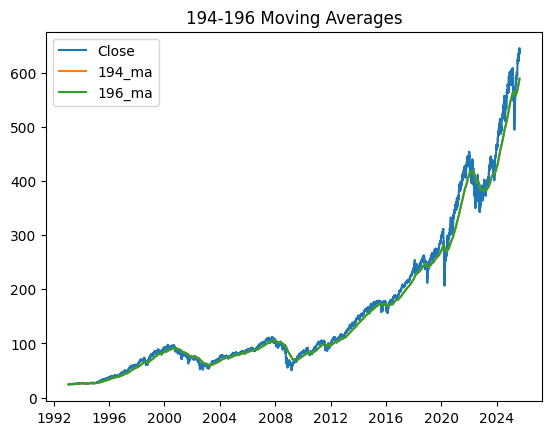

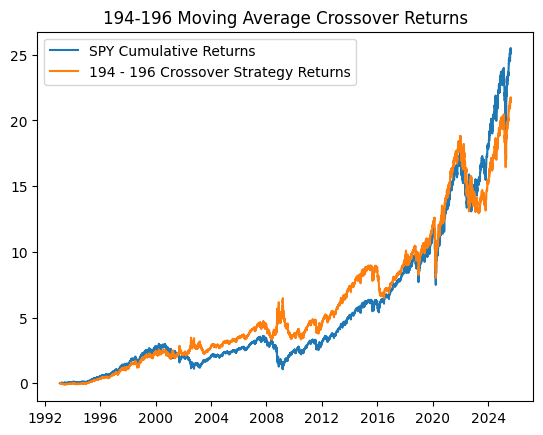

In [6]:
TICKER = 'SPY'
FAST = 194
SLOW = 196
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    # only return the subset of data you are interested in
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f'{FAST}_ma'] = df['Close'].ewm(span=fast).mean()
    df[f'{SLOW}_ma'] = df['Close'].ewm(span=slow).mean()

    plt.plot(df['Close'])
    plt.plot(df[f'{FAST}_ma'])
    plt.plot(df[f'{SLOW}_ma'])
    plt.legend(['Close', f'{FAST}_ma', f'{SLOW}_ma'])
    plt.title(f'{FAST}-{SLOW} Moving Averages');
    return df.dropna()

def add_strategy(df, fast, slow):
    
    # long when fast > slow, short otherwise
    df['Strategy'] = np.where(df[f'{fast}_ma'] > df[f'{slow}_ma'], 1, -1)
    df['Strategy'] = df['Strategy'].shift(1)
    return df

def test_strategy(df, ticker, fast, slow):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() -1

    plt.figure()
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', f'{fast} - {slow} Crossover Strategy Returns'])
    plt.title(f'{FAST}-{SLOW} Moving Average Crossover Returns'); 

    return df.dropna()

def main():
    df = get_data()
    df = add_moving_averages(df, FAST, SLOW)
    df = add_strategy(df, FAST, SLOW)
    df = test_strategy(df, TICKER, FAST, SLOW)

    return df

main()